In [5]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city= pd.read_csv(city_data_to_load)
ride= pd.read_csv(ride_data_to_load)

city.head()

# Combine the data into a single dataset
Merge_table= pd.merge(city,ride, on="city", how="outer")

# Display the data table for preview
Merge_table.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

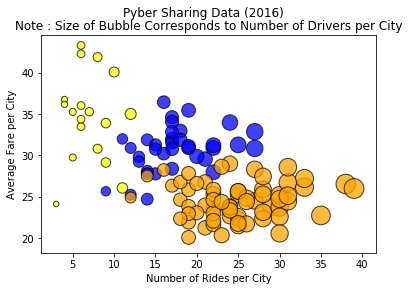

In [6]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types
city_types= Merge_table.groupby("city")

# Incorporate the other graph properties

driver_count = city_types['driver_count'].count()
average_fare = city_types.mean()['fare']
number_rides= city_types['ride_id'].count()
cities=city.set_index('city')['type']

# Create a legend
city_data = pd.DataFrame({
    "Number of Rides": number_rides,
    "Average Fare": average_fare,
    "Number of Drivers": driver_count,
    "City Type": cities
})


rural = city_data[city_data['City Type'] == 'Rural']
suburban = city_data[city_data['City Type'] == 'Suburban']
urban = city_data[city_data['City Type'] == 'Urban']


#print scatter plot

plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, facecolors = "yellow", edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, facecolors = "blue", edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, facecolors = "orange", edgecolor = 'black', label = 'Urban', alpha = .75)

plt.suptitle('Pyber Sharing Data (2016)')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')


# Incorporate a text label regarding circle size
plt.title('Note : Size of Bubble Corresponds to Number of Drivers per City')



# Save Figure

plt.savefig('plot.png')




## Total Fares by City Type

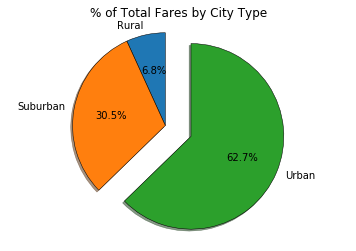

<Figure size 432x288 with 0 Axes>

In [9]:
# Calculate Type Percents
group_citytype = Merge_table.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by city
fare_sum = group_citytype.sum()['fare']

# Build Pie Chart
labels = fare_sum.index


explode = [0 , 0, .3]
plt.pie(fare_sum, startangle = 90, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})


plt.title('% of Total Fares by City Type')
plt.axis('equal')







# Save Figure
plt.savefig('pie_1.png')

## Total Rides by City Type

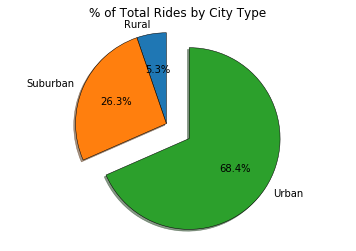

<Figure size 432x288 with 0 Axes>

In [16]:
# Calculate Ride Percents

ride_total = group_citytype.count()['ride_id']

labels = ride_total.index
plt.pie(ride_total, startangle = 90, explode = explode,  labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()


plt.savefig('pie_2.png')

## Total Drivers by City Type

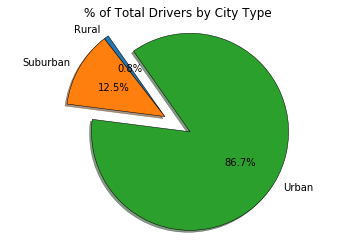

<Figure size 432x288 with 0 Axes>

In [18]:
# Calculate Driver Percents
driver_totals = group_citytype.sum()['driver_count']

labels = driver_totals.index
plt.pie(driver_totals, startangle = 125, explode = explode,  labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()
# Build Pie Charts

# Save Figure
plt.savefig('pie_3.png')

In [ ]:
## Conclusions

## The city type (suburban, urban, rural) determines very powerfully the number of drivers that are available. Urban areas have 
#the largest quantity of drivers and the rural the least.


# Although Urban areas are the places with higher demand, prices are higher in rural areas, this may be due because of the amount 
#of drivers available in those zones


